In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.083053648 W= 0.20634167 b= 1.1126174
Epoch: 0100 cost= 0.082357511 W= 0.2089141 b= 1.0941118
Epoch: 0150 cost= 0.081741571 W= 0.21133326 b= 1.0767084
Epoch: 0200 cost= 0.081196465 W= 0.21360885 b= 1.060338
Epoch: 0250 cost= 0.080714062 W= 0.21574907 b= 1.0449417
Epoch: 0300 cost= 0.080287203 W= 0.21776177 b= 1.0304619
Epoch: 0350 cost= 0.079909392 W= 0.21965508 b= 1.0168419
Epoch: 0400 cost= 0.079575039 W= 0.22143574 b= 1.0040318
Epoch: 0450 cost= 0.079279132 W= 0.2231104 b= 0.9919846
Epoch: 0500 cost= 0.079017222 W= 0.2246856 b= 0.9806529
Epoch: 0550 cost= 0.078785397 W= 0.2261671 b= 0.9699948
Epoch: 0600 cost= 0.078580216 W= 0.22756056 b= 0.95997036
Epoch: 0650 cost= 0.078398630 W= 0.22887082 b= 0.9505447
Epoch: 0700 cost= 0.078237928 W= 0.23010302 b= 0.94168043
Epoch: 0750 cost= 0.078095622 W= 0.2312621 b= 0.933342
Epoch: 0800 cost= 0.077969655 W= 0.23235221 b= 0.92549986
Epoch: 0850 cost= 0.077858135 W= 0.23337744 b= 0.91812426
Epoch: 0900 cost= 0.077759393 W= 0

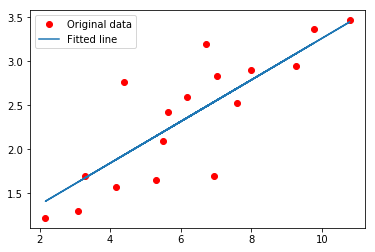

In [12]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()